# COGS 108 FA23 A04/A07
## Week 7 Demo: Inference
#### This demo is adapted from D6.

First, impoart packages needed and import our data:

In [1]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# import pandas & numpy library
import pandas as pd
import numpy as np

# Statmodels & patsy
import patsy
import statsmodels.api as sm

pulitzer = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/pulitzer/pulitzer-circulation-data.csv')

/Users/jasonc/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/jasonc/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
pulitzer.head()

,Newspaper,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014"
0,USA Today,"2,192,098","1,674,306",-24%,1,1,2
1,Wall Street Journal,"2,101,017","2,378,827",+13%,30,20,50
2,New York Times,"1,119,027","1,865,318",+67%,55,62,117
3,Los Angeles Times,"983,727","653,868",-34%,44,41,85
4,Washington Post,"760,034","474,767",-38%,52,48,100


In [3]:
# Let's take a look at the data types:

pulitzer.dtypes

Newspaper                                          object
Daily Circulation, 2004                            object
Daily Circulation, 2013                            object
Change in Daily Circulation, 2004-2013             object
Pulitzer Prize Winners and Finalists, 1990-2003     int64
Pulitzer Prize Winners and Finalists, 2004-2014     int64
Pulitzer Prize Winners and Finalists, 1990-2014     int64
dtype: object

From the dataset above, we can see that the numbers in daily circulation are all in string type and are separated with commas. In order to perform numerical analysis, we will need to remove the commas and convert the strings to floats.

In [4]:
#get rid of the commas in the numbers for Daily Circulation

pulitzer['Daily Circulation, 2004'] = pulitzer['Daily Circulation, 2004'].str.replace(',', '').astype(float)

# .str.replace(',', '') is used to remove all commas from the strings in this column. This is necessary 
# because numeric values formatted as strings often use commas as thousands separators, which need to 
# be eliminated for numerical operations.

pulitzer['Daily Circulation, 2013'] = pulitzer['Daily Circulation, 2013'].str.replace(',', '').astype(float)
pulitzer['Change in Daily Circulation, 2004-2013'] = pulitzer['Change in Daily Circulation, 2004-2013'].str.replace('%', '').astype(float)

In [5]:
# Now take another look:

pulitzer.dtypes

Newspaper                                           object
Daily Circulation, 2004                            float64
Daily Circulation, 2013                            float64
Change in Daily Circulation, 2004-2013             float64
Pulitzer Prize Winners and Finalists, 1990-2003      int64
Pulitzer Prize Winners and Finalists, 2004-2014      int64
Pulitzer Prize Winners and Finalists, 1990-2014      int64
dtype: object

Then let's take a look at daily circulation distribution in 2004 and in 2013.

In order to observe distributions, we can use histograms.

To better compare the distributions, we can use plt.subplots to plots two plots together.

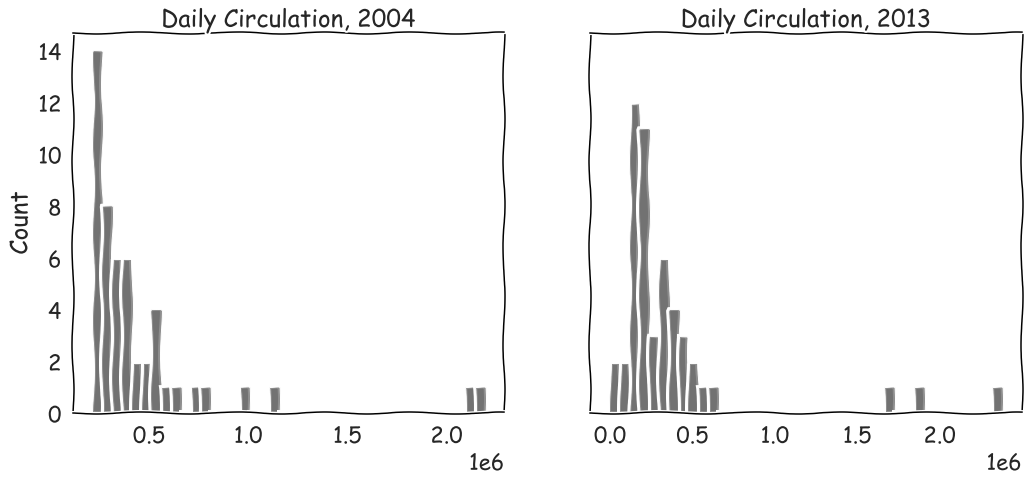

In [6]:
# I wanna set the style to 'xkcd' just for fun ;)
with plt.xkcd():
    # Creating a figure and a pair of subplots with shared Y-axis
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

    # Plotting a histogram for 'Daily Circulation, 2004' on the first subplot (ax1)
    sns.histplot(pulitzer['Daily Circulation, 2004'], ax=ax1, bins=40, color="dimgrey")
    # Setting the title for the first subplot to 'Daily Circulation, 2004'
    ax1.set_title('Daily Circulation, 2004')
    # Clearing the x-label for the first subplot as it's self-explanatory or not needed
    ax1.set_xlabel('')

    # Plotting a histogram for 'Daily Circulation, 2013' on the second subplot (ax2)
    sns.histplot(pulitzer['Daily Circulation, 2013'], ax=ax2, bins=40, color="dimgrey")
    # Setting the title for the second subplot to 'Daily Circulation, 2013'
    ax2.set_title('Daily Circulation, 2013')
    # Clearing the x-label for the second subplot as well
    ax2.set_xlabel('')

Now let's take a look at the distribution of *change* in daily circulation from 2004-2013:

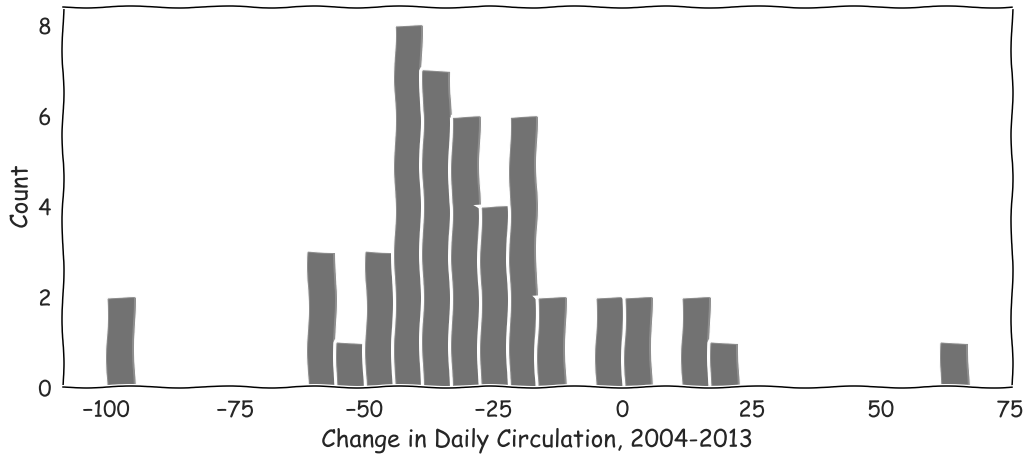

In [7]:
# Creating a histogram for the 'Change in Daily Circulation, 2004-2013' column in the 'pulitzer' DataFrame
with plt.xkcd():
    sns.histplot(pulitzer['Change in Daily Circulation, 2004-2013'],
                 kde=False,  # Disabling the Kernel Density Estimate (KDE) plot overlay
                 bins=30,    # Setting the number of bins in the histogram to 30
                 color="dimgrey");  # Setting the color of the histogram bars to dim grey

# Note: The semicolon at the end is often used in Python (especially in Jupyter notebooks) 
# to suppress unwanted output, not needed in scripts.

# The kde=False parameter specifies that the kernel density estimate, which is a smooth 
# curve representing the data distribution, should not be included in the plot.

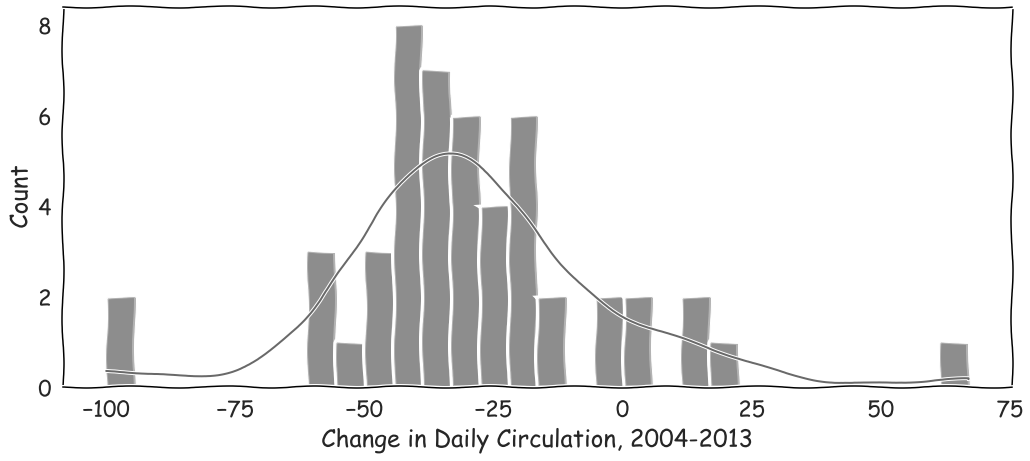

In [8]:
# Let's see what happens when we have kde = True:
with plt.xkcd():
    sns.histplot(pulitzer['Change in Daily Circulation, 2004-2013'],
                 kde=True,  # Enabling the Kernel Density Estimate (KDE) plot overlay
                 bins=30,    # Setting the number of bins in the histogram to 30
                 color="dimgrey");  # Setting the color of the histogram bars to dim grey

    # You will see a smooth line representing the distribution of your data.

We can see from the histrogram that we have a paper with very great positive change in daily circulation. Let'e find which one it is:

In [9]:
# determine which paper has a positive change in circulation much larger than other papers

pulitzer[pulitzer['Change in Daily Circulation, 2004-2013'] > 30] 

,Newspaper,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014"
2,New York Times,1119027.0,1865318.0,67.0,55,62,117


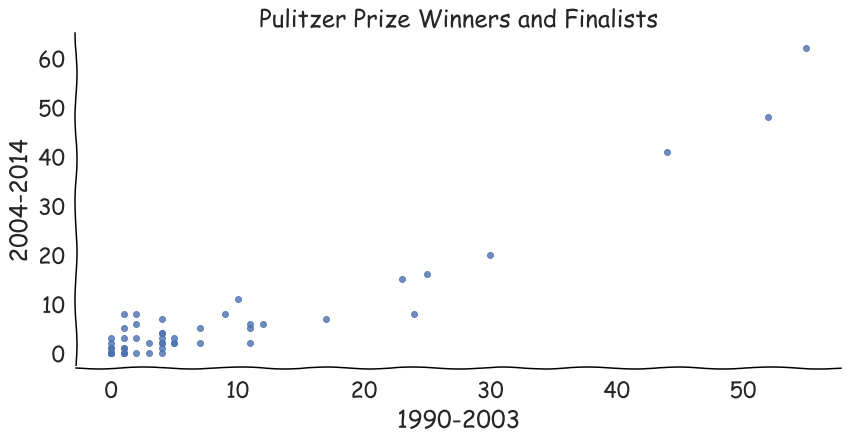

In [10]:
with plt.xkcd():
    # Creating a scatter plot using seaborn's lmplot function
    sns.lmplot(x = 'Pulitzer Prize Winners and Finalists, 1990-2003',  # Setting the x-axis to represent data from 1990-2003
               y = 'Pulitzer Prize Winners and Finalists, 2004-2014',  # Setting the y-axis to represent data from 2004-2014
               data = pulitzer,  # Specifying the DataFrame 'pulitzer' as the source of data
               fit_reg = False,  # Disabling the regression line, since this is a scatter plot only
               height = 6,  # Setting the height of the plot
               aspect=2)  # Setting the aspect ratio (width = 2 * height)

    # Setting the labels for x and y axes
    plt.xlabel('1990-2003')
    plt.ylabel('2004-2014')

    # Adding a title to the plot
    plt.title('Pulitzer Prize Winners and Finalists');

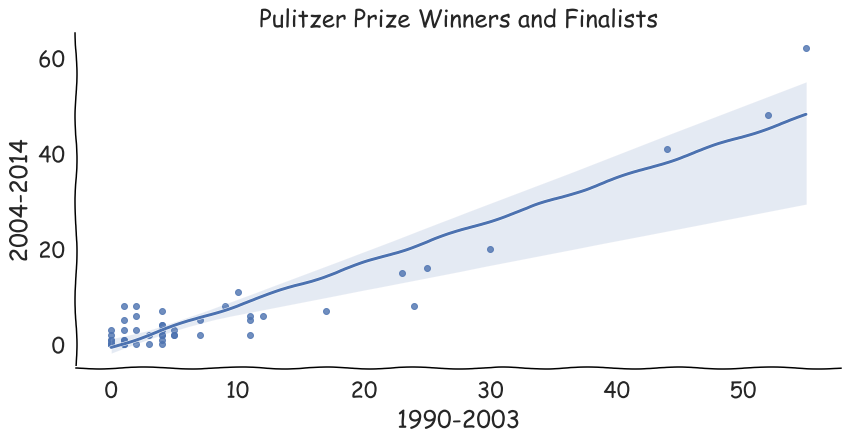

In [11]:
with plt.xkcd():
    # Creating a scatter plot using seaborn's lmplot function
    sns.lmplot(x = 'Pulitzer Prize Winners and Finalists, 1990-2003',  # Setting the x-axis to represent data from 1990-2003
               y = 'Pulitzer Prize Winners and Finalists, 2004-2014',  # Setting the y-axis to represent data from 2004-2014
               data = pulitzer,  # Specifying the DataFrame 'pulitzer' as the source of data
               fit_reg = True,  # Let's enable the regression fit.
               height = 6,  # Setting the height of the plot
               aspect=2)  # Setting the aspect ratio (width = 2 * height)

    # Setting the labels for x and y axes
    plt.xlabel('1990-2003')
    plt.ylabel('2004-2014')

    # Adding a title to the plot
    plt.title('Pulitzer Prize Winners and Finalists');

What you should see here is that there appears to be some general positive relationship but note that there are outliers in circulation, where circulation is much higher than number of Pulitzers won as well as outliers in Pulitzers won. Overall, most of the data are clustered around zero Pulitzers. This is because the distributions of both of our variables are skewed right. This suggests that we may need to transform these data to use linear regression to ensure that the large outlier values are not driving our relationship.

So, as discussed in class: Apply a log10-transformation the Pulitzer count data, with an offset of 0.1.

This will shift the values away from being centered near zero when put on the log scale. Store this in a new column pulitzer_log10.

In [12]:
# log transform with a 0.1 offset

pulitzer['pulitzer_log10'] = np.log10(pulitzer['Pulitzer Prize Winners and Finalists, 1990-2014'] + 0.1)

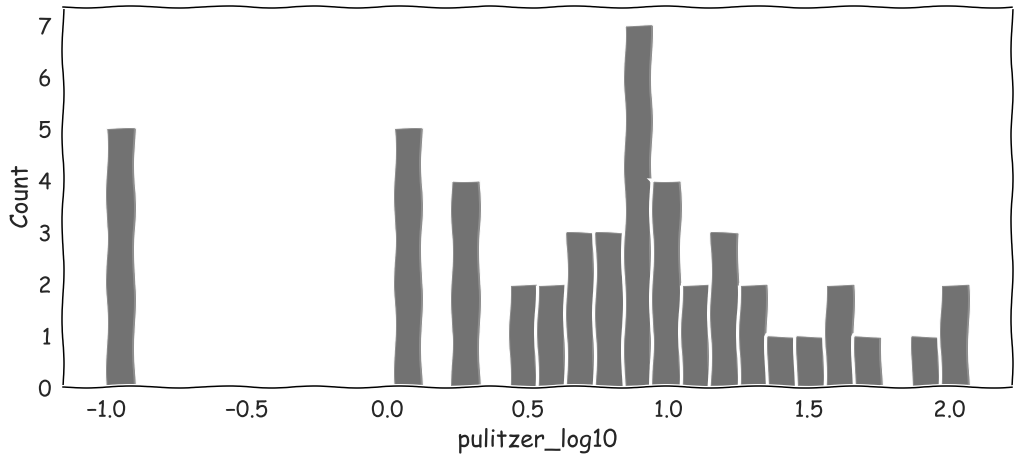

In [13]:
# visualize the distribtuion of the log10 column
with plt.xkcd():
    sns.histplot(pulitzer['pulitzer_log10'], bins=30, color="dimgrey")
    ax1.set_xlabel('1990-2003')
    ax1.set_ylabel('Number of Pulitzers');

Let's observe the relationship again:

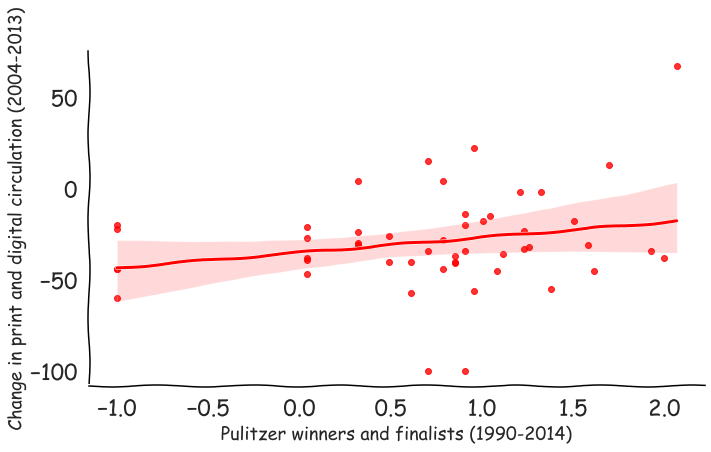

In [14]:
with plt.xkcd():
    sns.lmplot(x = 'pulitzer_log10',
               y = 'Change in Daily Circulation, 2004-2013',
               data = pulitzer, 
               fit_reg = True, 
               height = 6,
               aspect = 1.7, 
               line_kws={'color': 'red'},
               scatter_kws={'color': 'red'})
    plt.xlabel('Pulitzer winners and finalists (1990-2014)', size=18)
    plt.ylabel('Change in print and digital circulation (2004-2013)', size=18)
    plt.title('');

And let's perform a linear regression:

In [15]:
# Preparing the data
# Selecting the 'Change in Daily Circulation, 2004-2013' and 'pulitzer_log10' columns from the pulitzer DataFrame
# and renaming these columns to 'circulation' and 'pulitzer_log10' for simplicity
df = pulitzer[['Change in Daily Circulation, 2004-2013', 'pulitzer_log10']]
df.columns = ['circulation', 'pulitzer_log10']
# Displaying the first few rows of the dataframe for a quick overview
df.head()

# Using patsy to create matrices for the outcome (dependent variable) and predictors (independent variable)
# 'circulation ~ pulitzer_log10' is the model formula, indicating that circulation is predicted by pulitzer_log10
outcome, predictors = patsy.dmatrices('circulation ~ pulitzer_log10', df)

# Initializing an Ordinary Least Squares (OLS) linear model with statsmodels
# The model is set up but not computed at this stage
mod_log = sm.OLS(outcome, predictors)

# Fitting the model to the data
# This step computes the linear regression model
res_log = mod_log.fit()

# Printing a summary of the regression results
# This provides detailed information about the model's performance and coefficients
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:            circulation   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.800
Date:                Sun, 12 Nov 2023   Prob (F-statistic):              0.101
Time:                        19:52:22   Log-Likelihood:                -233.94
No. Observations:                  50   AIC:                             471.9
Df Residuals:                      48   BIC:                             475.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -35.1237      5.164     -6.

What did you see?